In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

1) Reading data from csv file

In [ ]:
data=pd.read_csv("data/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

2) Grouping by features and Visualization data

In [ ]:
genders = data.groupby(['gender']).count()
genders

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482


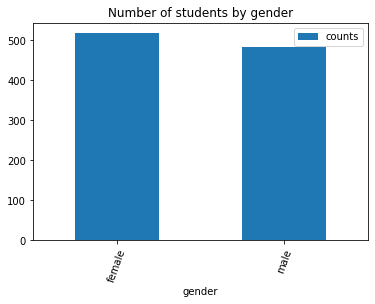

In [ ]:
genders_df=pd.DataFrame(data={'gender':['female','male'], 'counts':genders["lunch"]})
genders_df.plot.bar(x="gender", y="counts", rot=70, title="Number of students by gender")
plt.show()

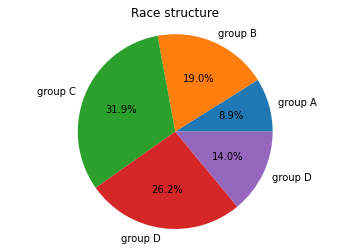

In [ ]:
race_df = data.groupby(['race/ethnicity']).count()
race=["group A","group B","group C","group D","group D"]
qty=race_df['gender']
plt.pie(qty,labels=race,autopct='%1.1f%%')
plt.title('Race structure')
plt.axis('equal')
plt.show()

3) Data Processing

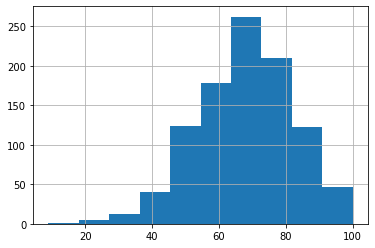

In [ ]:
data["total_score"]=data['math score'] + data['reading score'] + data['writing score']
data["average_score"]=data["total_score"]/3
data["average_score"]
data["average_score"].hist()

In [ ]:
def success(average_score):
    if(average_score >= 70):
        return 'passed'
    else :
        return 'failed'
data['success'] = data.apply(lambda g: success(g['average_score']), axis = 1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score,success
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,passed
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,passed
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,failed
4,male,group C,some college,standard,none,76,78,75,229,76.333333,passed


In [ ]:
def grades(average_score):
    if(average_score >= 90):
        return 'A'
    if(average_score >= 80):
        return 'B'
    if(average_score >= 70):
        return 'C'
    if(average_score >= 60):
        return 'D'
    if(average_score >= 40):
        return 'E'
    else :
        return 'F'

data['grades'] = data.apply(lambda a: grades(a['average_score']), axis = 1)

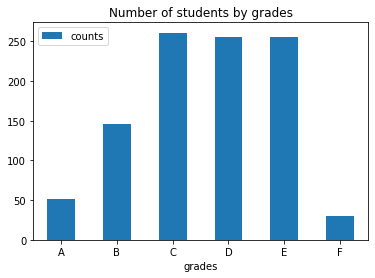

In [ ]:
grades = data.groupby(['grades']).count()
grades_df=pd.DataFrame(data={'grades':['A','B','C','D','E','F'], 'counts':grades["lunch"]})
grades_df.plot.bar(x="grades", y="counts",rot=0, title="Number of students by grades")
plt.show()


4) Data Encoding

In [ ]:
data[data.isnull().any(axis=1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score,success,grades


In [ ]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['gender'].replace({'female': 1, 'male': 0}, inplace=True)

In [ ]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
data['race/ethnicity'].replace({'group A': 0, 'group B': 1,'group C': 2,'group D': 3,'group E': 4}, inplace=True)

In [ ]:
data['grades'].unique()

array(['C', 'B', 'A', 'E', 'D', 'F'], dtype=object)

In [ ]:
data['grades'].replace({'A': 0, 'B': 1,'C': 2,'D': 3,'E': 4,'F':5}, inplace=True)

In [ ]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
data['parental level of education'].replace({'bachelor\'s degree': 0, 'some college': 1,"master\'s degree": 2,'associate\'s degree': 3,'high school': 4,'some high school': 5}, inplace=True)

In [ ]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
data['lunch'].replace({'standard': 1, 'free/reduced': 0}, inplace=True)

In [ ]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
data['test preparation course'].replace({'none': 0, 'completed': 1}, inplace=True)

In [ ]:
data['success'].unique()

array(['passed', 'failed'], dtype=object)

In [ ]:
data['success'].replace({'failed': 0, 'passed': 1}, inplace=True)

In [ ]:
data['success']

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: success, Length: 1000, dtype: int64

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score,success,grades
0,1,1,0,1,0,72,72,74,218,72.666667,1,2
1,1,2,1,1,1,69,90,88,247,82.333333,1,1
2,1,1,2,1,0,90,95,93,278,92.666667,1,0
3,0,0,3,0,0,47,57,44,148,49.333333,0,4
4,0,2,1,1,0,76,78,75,229,76.333333,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,4,2,1,1,88,99,95,282,94.000000,1,0
996,0,2,4,0,0,62,55,55,172,57.333333,0,4
997,1,2,4,0,1,59,71,65,195,65.000000,0,3
998,1,3,1,1,1,68,78,77,223,74.333333,1,2


In [ ]:
X = data[['gender', 'race/ethnicity','parental level of education','lunch','test preparation course','average_score']]
y=data[['grades']]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=42,shuffle=True)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

In [ ]:
log_reg=LogisticRegression(max_iter=10000, C=100,solver='saga')
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_train.shape

(670, 6)

In [ ]:
y_train.shape

(670, 1)

In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 1.16590621e-01  1.67117126e-01  1.39288904e-01  1.49440004e+00
   1.13462851e+00  4.57469898e+01]
 [-2.19116897e-01  6.05759185e-02 -3.10242328e-02 -3.70914634e-01
   2.53708797e-01  3.02071639e+01]
 [ 6.11754825e-02  3.21672965e-02 -3.20876713e-01 -2.24928650e-02
  -3.29342288e-02  1.09707408e+01]
 [ 3.61622359e-02 -1.19090460e-01  3.52724275e-02 -3.41224310e-01
  -3.14710222e-01 -1.17376653e+01]
 [ 2.19590798e-01 -1.16584204e-01  7.66010093e-02 -1.92209378e-01
  -6.89433094e-01 -3.24174125e+01]
 [-2.14402241e-01 -2.41856764e-02  1.00738606e-01 -5.67558851e-01
  -3.51259760e-01 -4.27698168e+01]]
[-25.95837059   0.05384852  16.35291154  18.88462263   6.18319479
 -15.51620688]


In [ ]:
y_pred = log_reg.predict(x_test)
y_pred

array([3, 3, 3, 3, 1, 3, 3, 3, 4, 2, 3, 3, 3, 3, 4, 1, 2, 1, 4, 3, 3, 4,
       3, 4, 2, 1, 4, 0, 4, 3, 2, 2, 4, 4, 4, 4, 1, 4, 5, 2, 3, 3, 2, 4,
       2, 4, 4, 2, 4, 3, 1, 1, 3, 0, 1, 3, 2, 4, 4, 2, 3, 1, 1, 2, 3, 4,
       3, 4, 2, 2, 3, 0, 0, 1, 2, 2, 4, 3, 3, 3, 4, 2, 4, 4, 1, 4, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 5, 4, 1, 2, 4, 3, 3, 1, 3, 2, 1, 2, 3, 5, 1,
       3, 3, 2, 2, 2, 5, 1, 2, 5, 4, 0, 5, 2, 3, 1, 4, 4, 2, 4, 1, 1, 3,
       3, 2, 1, 1, 1, 2, 2, 4, 5, 4, 4, 3, 2, 3, 2, 1, 1, 4, 2, 4, 3, 3,
       2, 4, 2, 3, 2, 2, 2, 3, 0, 2, 3, 3, 3, 4, 2, 3, 4, 3, 2, 3, 5, 2,
       2, 0, 2, 4, 4, 4, 1, 4, 4, 4, 3, 2, 4, 2, 2, 4, 1, 1, 4, 2, 1, 1,
       3, 4, 4, 3, 3, 4, 3, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 4, 2,
       4])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0,  0,  0,  0],
       [ 0, 31,  2,  0,  0,  0],
       [ 0,  0, 56,  2,  0,  0],
       [ 0,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  2,  8]])

In [ ]:
score = log_reg.score(x_test, y_test)
score

0.9728506787330317

In [ ]:
y_pred_2 = log_reg.predict(x_val)
y_pred_2

array([4, 1, 4, 2, 5, 4, 3, 3, 3, 1, 5, 4, 4, 2, 4, 1, 3, 2, 2, 2, 2, 3,
       2, 1, 2, 5, 2, 2, 4, 2, 3, 4, 3, 4, 1, 0, 0, 4, 2, 3, 3, 4, 4, 1,
       4, 3, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 1, 4, 2, 2, 1, 4, 4, 4,
       2, 1, 4, 1, 3, 2, 3, 0, 2, 4, 4, 4, 2, 2, 4, 1, 3, 3, 1, 4, 3, 3,
       4, 4, 0, 4, 2, 3, 3, 2, 3, 3, 2, 4, 1, 4, 4, 3, 3, 5, 1, 5, 2])

In [ ]:
confusion_matrix(y_val, y_pred_2)

array([[ 2,  1,  0,  0,  0,  0],
       [ 2, 12,  0,  0,  0,  0],
       [ 0,  1, 28,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0],
       [ 0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [ ]:
score_2 = log_reg.score(x_val, y_val)
score_2

0.963302752293578

In [ ]:
x_val.shape

(109, 6)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [ ]:
ovo_clf.predict(x_test)

array([3, 3, 3, 3, 1, 3, 3, 3, 4, 2, 3, 3, 2, 3, 4, 1, 2, 1, 4, 3, 3, 4,
       3, 4, 2, 1, 4, 0, 4, 3, 2, 2, 4, 4, 4, 4, 0, 4, 5, 2, 3, 2, 2, 4,
       2, 4, 4, 2, 4, 3, 1, 1, 3, 0, 1, 3, 2, 4, 4, 2, 3, 1, 1, 2, 3, 4,
       2, 4, 2, 2, 3, 0, 0, 1, 2, 2, 5, 3, 3, 3, 4, 2, 4, 4, 1, 4, 3, 2,
       2, 2, 3, 2, 0, 2, 3, 5, 4, 1, 2, 4, 3, 3, 1, 3, 2, 1, 2, 3, 5, 1,
       3, 3, 2, 2, 2, 5, 1, 2, 5, 4, 0, 5, 2, 2, 1, 4, 4, 2, 4, 1, 1, 3,
       3, 2, 0, 1, 1, 2, 2, 5, 4, 4, 4, 3, 2, 3, 2, 1, 1, 4, 2, 4, 3, 3,
       2, 4, 2, 3, 2, 2, 2, 3, 0, 2, 3, 3, 3, 4, 2, 3, 4, 3, 2, 3, 5, 2,
       2, 0, 2, 3, 4, 4, 1, 4, 4, 4, 3, 2, 4, 2, 2, 4, 1, 1, 4, 2, 1, 0,
       3, 4, 4, 2, 3, 4, 3, 0, 0, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 4, 2,
       4])

In [ ]:
y_train_pred=cross_val_predict(ovo_clf,x_train,y_train,cv=3)
y_train_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 1, 4, 2, 2, 4, 3, 1, 3, 2, 4, 2, 1, 2, 1, 4, 0, 2, 2, 4, 1,
       5, 4, 2, 4, 2, 5, 3, 1, 2, 0, 4, 2, 1, 3, 2, 3, 3, 1, 3, 3, 2, 3,
       0, 2, 3, 4, 4, 1, 4, 5, 2, 1, 3, 3, 2, 2, 1, 3, 3, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 2, 3, 0, 4, 1, 4, 4, 5, 2, 4, 2, 3, 1, 2, 3, 0, 4, 3,
       2, 1, 5, 1, 4, 4, 4, 3, 3, 4, 2, 4, 1, 3, 3, 1, 2, 2, 4, 4, 2, 3,
       1, 4, 0, 2, 1, 2, 1, 4, 4, 2, 2, 1, 4, 4, 3, 1, 2, 2, 4, 3, 4, 4,
       2, 4, 3, 0, 0, 2, 3, 4, 1, 2, 3, 2, 2, 4, 4, 2, 2, 2, 3, 1, 4, 3,
       0, 3, 4, 4, 3, 2, 1, 4, 4, 2, 1, 3, 2, 2, 4, 3, 2, 2, 4, 2, 1, 4,
       3, 4, 1, 3, 2, 2, 3, 2, 4, 4, 3, 0, 1, 4, 3, 3, 2, 4, 3, 1, 1, 3,
       3, 4, 3, 4, 4, 4, 4, 3, 4, 5, 2, 3, 4, 4, 3, 3, 2, 3, 4, 3, 3, 2,
       1, 3, 2, 4, 2, 3, 2, 0, 3, 2, 4, 1, 4, 1, 0, 2, 3, 2, 3, 3, 0, 2,
       2, 4, 4, 3, 4, 1, 4, 0, 2, 4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 2, 1, 4,
       4, 3, 2, 2, 3, 3, 5, 3, 2, 3, 3, 3, 3, 2, 5, 1, 3, 4, 2, 0, 4, 0,
       0, 2, 2, 4, 3, 3, 3, 1, 1, 4, 3, 2, 3, 1, 2,

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 35,   4,   0,   0,   0,   0],
       [  2,  85,  12,   0,   0,   0],
       [  0,   5, 156,  13,   0,   0],
       [  0,   0,   4, 166,   5,   0],
       [  0,   0,   0,   4, 161,   3],
       [  0,   0,   0,   0,   6,   9]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        33
           2       0.97      0.97      0.97        58
           3       0.97      1.00      0.98        59
           4       0.96      1.00      0.98        51
           5       1.00      0.80      0.89        10

    accuracy                           0.97       221
   macro avg       0.98      0.95      0.96       221
weighted avg       0.97      0.97      0.97       221

